In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read Data

In [16]:
path = "../../../data/"
file_name = path + "Monte-Carlo-Simulation-Head-Phantom/2020-03-20_11-45_Proton_230MeV_Head-Phantom_epi_4702263107.csv"
df = pd.read_csv(file_name)

* I removed the data which std is 0
* Because it always has same data.

In [17]:
df.drop(['sourcePosZ','sourceID','runID','rotationAngle','comptVolName','RayleighVolName',
         'nPhantomCompton','nCrystalCompton','nPhantomRayleigh','nCrystalRayleigh',
         'primaryID','level2ID','level3ID','level4ID','layerID','baseID'], axis="columns", inplace=True)

In [18]:
df.columns

Index(['PDGEncoding', 'trackID', 'parentID', 'trackLocalTime', 'time', 'edep',
       'stepLength', 'trackLength', 'posX', 'posY', 'posZ', 'localPosX',
       'localPosY', 'localPosZ', 'momDirX', 'momDirY', 'momDirZ', 'level1ID',
       'photonID', 'sourcePosX', 'sourcePosY', 'eventID', 'axialPos',
       'volumeID', 'processName'],
      dtype='object')

* First, I investigated the types of particle.

PDGEncoding
1.100000e+01    32319
2.200000e+01       11
2.212000e+03    18031
1.000020e+09        2
1.000140e+09        2
dtype: int64


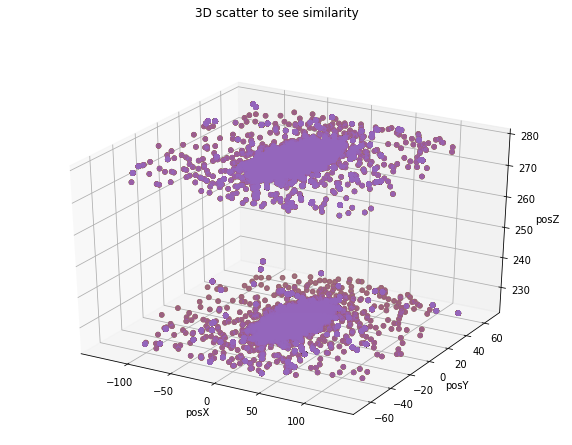

In [19]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
#ax.scatter(df['posX'],df['posY'],df['posZ'], s=1, c=df['PGDEncoding'])
groups = df.loc[:,['PDGEncoding','posX','posY','posZ']]

groups=groups.set_index("PDGEncoding").groupby("PDGEncoding")
print(groups.size())
for posY,posZ in groups:
    ax.scatter(df['posX'],df['posY'],df['posZ'])
ax.set_xlabel("posX")
ax.set_ylabel("posY")
ax.set_zlabel("posZ")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

* I found that there is clusters that has lots of scatter plot.